<a href="https://colab.research.google.com/github/jolied-14/MLE-F2025/blob/main/ClassParticipation19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# reshape, normalize the image data & concatenate
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1) / 255.0

x_combined = np.concatenate((x_train_flat, x_test_flat), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

print("Shape of combined images:", x_combined.shape)
print("Shape of combined labels:", y_combined.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of combined images: (70000, 784)
Shape of combined labels: (70000,)


In [2]:
from sklearn.ensemble import RandomForestClassifier

# instantiate and fit a RandomForestClassifier object
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_combined, y_combined)

RandomForestClassifier(n_estimators=200, random_state=42)

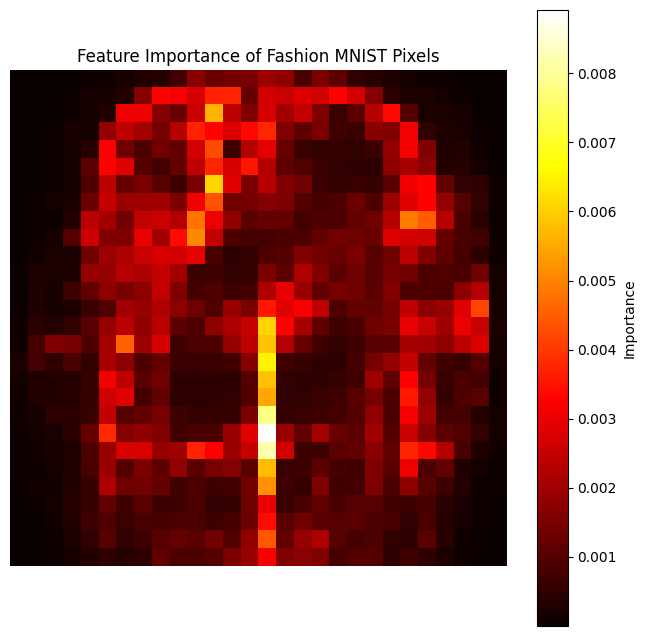

In [3]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Reshape the feature importances into a 28x28 image
feature_importance_image = feature_importances.reshape(28, 28)

# Visualize the feature importance using a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(feature_importance_image, cmap='hot', interpolation='nearest')
plt.title('Feature Importance of Fashion MNIST Pixels')
plt.colorbar(label='Importance')
plt.axis('off') # Turn off axis numbers and ticks
plt.show()